# Quantum Zeno Effect: Measurement-Induced Suppression of Quantum Evolution

## 1. Introduction

The **Quantum Zeno Effect** (QZE), named after the ancient Greek philosopher Zeno of Elea and his paradoxes of motion, describes the remarkable phenomenon whereby frequent measurements can inhibit the evolution of a quantum system. First theoretically predicted by Misra and Sudarshan in 1977, this effect demonstrates one of the most counterintuitive aspects of quantum mechanics: the act of observation fundamentally alters the dynamics of a quantum system.

## 2. Theoretical Framework

### 2.1 Quantum State Evolution

Consider a quantum system initially prepared in state $|\psi_0\rangle$. Under the Schrödinger equation, the time evolution is governed by the Hamiltonian $\hat{H}$:

$$|\psi(t)\rangle = e^{-i\hat{H}t/\hbar}|\psi_0\rangle$$

For a two-level system (qubit) with states $|0\rangle$ and $|1\rangle$, we can write the Hamiltonian as:

$$\hat{H} = \frac{\hbar\Omega}{2}\hat{\sigma}_x = \frac{\hbar\Omega}{2}(|0\rangle\langle 1| + |1\rangle\langle 0|)$$

where $\Omega$ is the Rabi frequency characterizing the transition rate between states.

### 2.2 Survival Probability Without Measurement

If the system starts in state $|0\rangle$, the probability of finding it in the initial state after time $t$ (survival probability) is:

$$P_\text{survival}(t) = |\langle 0|\psi(t)\rangle|^2 = \cos^2\left(\frac{\Omega t}{2}\right)$$

This represents coherent Rabi oscillations between the two states.

### 2.3 The Quantum Zeno Effect

Now consider performing $n$ projective measurements at regular intervals $\tau = T/n$ during a total time $T$. Each measurement projects the system back onto one of the basis states.

The probability of remaining in state $|0\rangle$ after a single interval $\tau$ is:

$$P_1 = \cos^2\left(\frac{\Omega\tau}{2}\right) \approx 1 - \frac{\Omega^2\tau^2}{4}$$

for small $\tau$. After $n$ measurements:

$$P_n = \left[\cos^2\left(\frac{\Omega T}{2n}\right)\right]^n$$

In the limit of infinitely frequent measurements ($n \to \infty$):

$$\lim_{n\to\infty} P_n = \lim_{n\to\infty} \left[1 - \frac{\Omega^2 T^2}{4n^2}\right]^n = 1$$

**This is the Quantum Zeno Effect**: continuous observation "freezes" the quantum state, preventing its natural evolution.

### 2.4 Short-Time Quadratic Decay

The QZE relies on the **quadratic** behavior of the survival probability at short times:

$$P_\text{survival}(t) \approx 1 - \frac{t^2}{\tau_Z^2}$$

where $\tau_Z = 2/\Omega$ is the Zeno time. This quadratic decay (rather than exponential) is essential for the effect to occur.

## 3. Numerical Simulation

We now implement a numerical simulation to demonstrate the Quantum Zeno Effect in a two-level system undergoing Rabi oscillations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Set up plot styling
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 11,
    'figure.figsize': (12, 8)
})

# Physical parameters
hbar = 1.0  # Natural units
Omega = 2 * np.pi  # Rabi frequency (one full oscillation per unit time)

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
identity = np.eye(2, dtype=complex)

# Hamiltonian for Rabi oscillations
H = (hbar * Omega / 2) * sigma_x

# Initial state |0⟩
psi_0 = np.array([1, 0], dtype=complex)

# Projection operator onto |0⟩
P_0 = np.array([[1, 0], [0, 0]], dtype=complex)

print("Hamiltonian H = (ℏΩ/2)σₓ:")
print(H)
print(f"\nRabi frequency Ω = {Omega:.4f} rad/unit time")
print(f"Period of Rabi oscillation T_Rabi = {2*np.pi/Omega:.4f} time units")

Hamiltonian H = (ℏΩ/2)σₓ:
[[0.        +0.j 3.14159265+0.j]
 [3.14159265+0.j 0.        +0.j]]

Rabi frequency Ω = 6.2832 rad/unit time
Period of Rabi oscillation T_Rabi = 1.0000 time units


In [2]:
def evolve_unitary(psi, H, t):
    """
    Evolve quantum state under unitary evolution.
    
    Parameters:
    -----------
    psi : ndarray
        Initial quantum state vector
    H : ndarray
        Hamiltonian matrix
    t : float
        Evolution time
    
    Returns:
    --------
    ndarray : Evolved state vector
    """
    U = expm(-1j * H * t / hbar)
    return U @ psi


def measure_and_project(psi, P):
    """
    Perform projective measurement and return outcome.
    
    Parameters:
    -----------
    psi : ndarray
        Quantum state vector
    P : ndarray
        Projection operator
    
    Returns:
    --------
    tuple : (projected_state, measurement_outcome)
        projected_state is normalized post-measurement state
        measurement_outcome is True if projection succeeded
    """
    # Probability of measuring the projected state
    prob = np.real(np.conj(psi) @ P @ psi)
    
    # Simulate measurement outcome
    if np.random.random() < prob:
        # Measurement found system in projected state
        projected = P @ psi
        norm = np.sqrt(np.real(np.conj(projected) @ projected))
        return projected / norm, True
    else:
        # Measurement found system in orthogonal state
        return None, False


def survival_probability_no_measurement(t, Omega):
    """
    Analytical survival probability without measurement (Rabi oscillations).
    """
    return np.cos(Omega * t / 2)**2


def survival_probability_zeno(T, n, Omega):
    """
    Analytical survival probability with n measurements during time T.
    """
    if n == 0:
        return survival_probability_no_measurement(T, Omega)
    tau = T / n
    return np.cos(Omega * tau / 2)**(2*n)

In [3]:
def simulate_zeno_effect(psi_0, H, P_0, T_total, n_measurements, n_trials=1000):
    """
    Monte Carlo simulation of quantum Zeno effect.
    
    Parameters:
    -----------
    psi_0 : ndarray
        Initial state
    H : ndarray
        Hamiltonian
    P_0 : ndarray
        Projection operator for survival
    T_total : float
        Total evolution time
    n_measurements : int
        Number of measurements to perform
    n_trials : int
        Number of Monte Carlo trials
    
    Returns:
    --------
    float : Estimated survival probability
    """
    if n_measurements == 0:
        # No measurements - just evolve
        psi_final = evolve_unitary(psi_0, H, T_total)
        return np.abs(np.conj(psi_0) @ psi_final)**2
    
    tau = T_total / n_measurements
    survivals = 0
    
    for _ in range(n_trials):
        psi = psi_0.copy()
        survived = True
        
        for _ in range(n_measurements):
            # Evolve for time tau
            psi = evolve_unitary(psi, H, tau)
            
            # Perform measurement
            psi, in_initial = measure_and_project(psi, P_0)
            
            if not in_initial:
                survived = False
                break
        
        if survived:
            survivals += 1
    
    return survivals / n_trials


# Test the simulation
T_test = 0.5  # Half a Rabi period
print("Testing simulation vs analytical formula:")
print(f"\nTotal evolution time T = {T_test:.2f}")
print("-" * 50)

for n in [0, 1, 5, 10, 20]:
    analytical = survival_probability_zeno(T_test, n, Omega)
    simulated = simulate_zeno_effect(psi_0, H, P_0, T_test, n, n_trials=5000)
    print(f"n = {n:2d} measurements: Analytical = {analytical:.4f}, Simulated = {simulated:.4f}")

Testing simulation vs analytical formula:

Total evolution time T = 0.50
--------------------------------------------------
n =  0 measurements: Analytical = 0.0000, Simulated = 0.0000
n =  1 measurements: Analytical = 0.0000, Simulated = 0.0000


n =  5 measurements: Analytical = 0.6054, Simulated = 0.5950


n = 10 measurements: Analytical = 0.7805, Simulated = 0.7788


n = 20 measurements: Analytical = 0.8838, Simulated = 0.8880


## 4. Visualization of the Quantum Zeno Effect

We now create comprehensive visualizations demonstrating:
1. Survival probability vs. number of measurements
2. Time evolution with different measurement frequencies
3. The transition from quantum decay to Zeno freezing

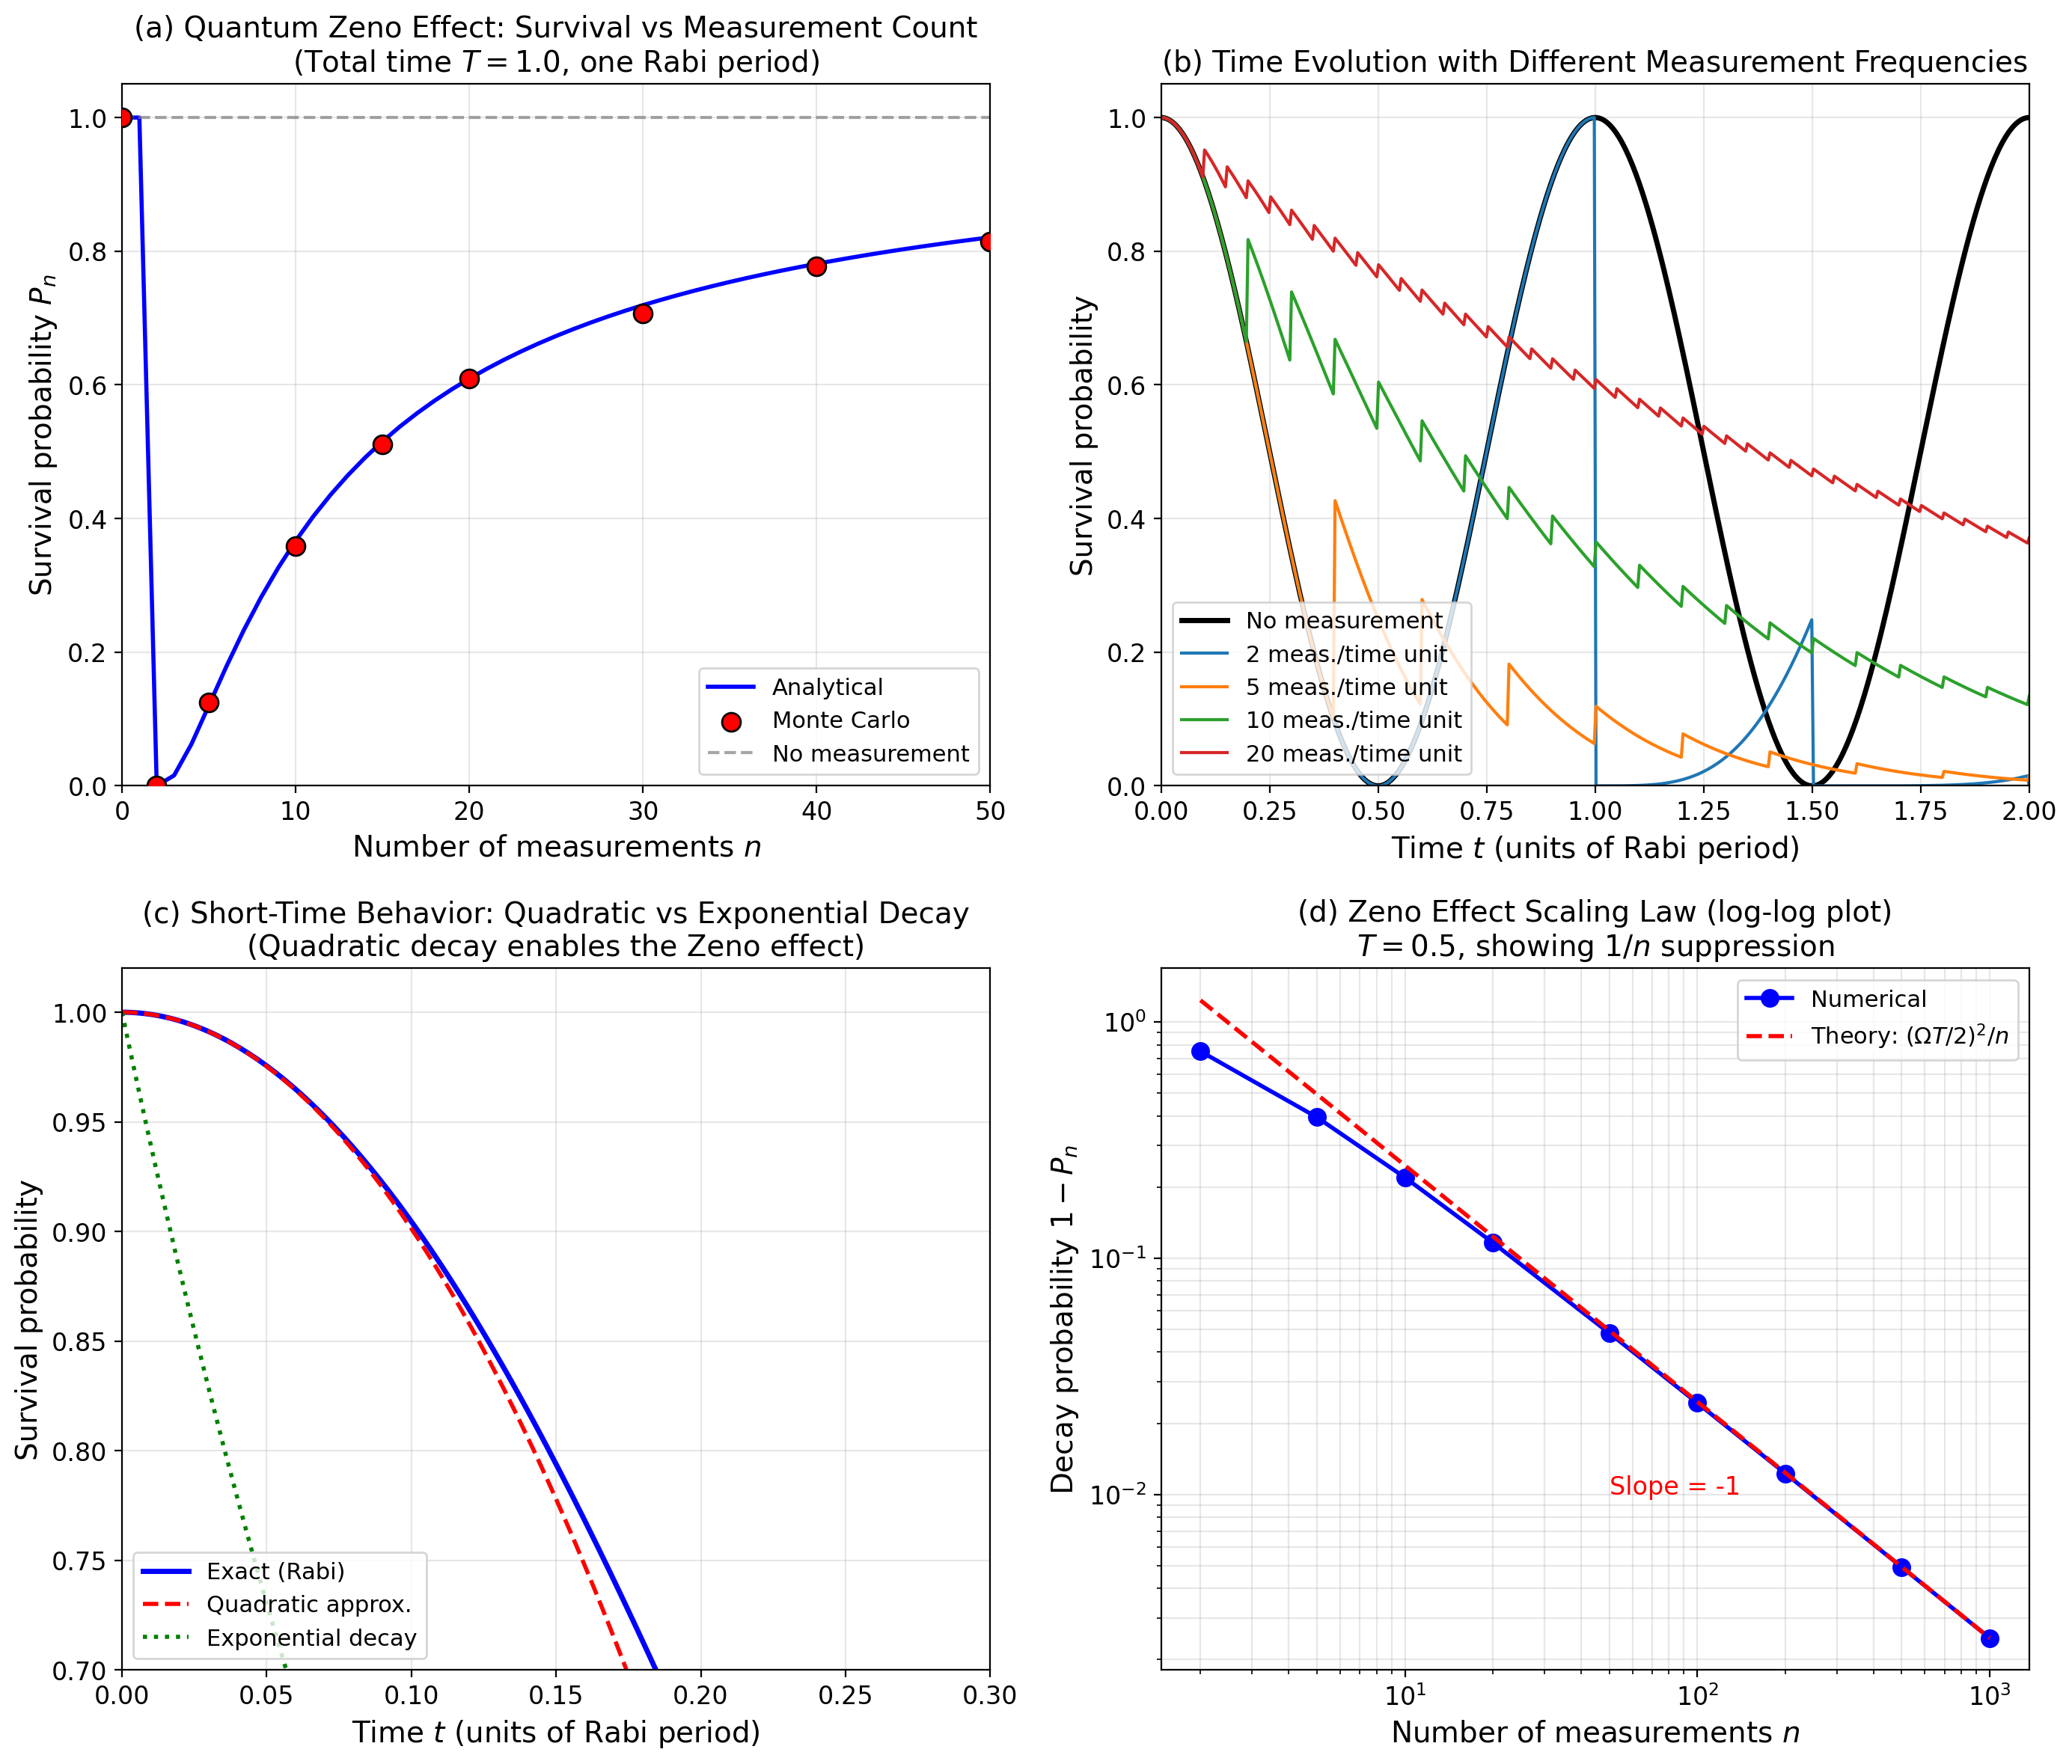


Figure saved to 'plot.png'


In [4]:
# Create comprehensive figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ============================================================
# Panel (a): Survival probability vs number of measurements
# ============================================================
ax1 = axes[0, 0]

T_fixed = 1.0  # Fixed total time (one Rabi period)
n_measurements_range = np.arange(0, 51)

# Analytical predictions
P_analytical = [survival_probability_zeno(T_fixed, n, Omega) for n in n_measurements_range]

# Monte Carlo simulations
n_sample_points = [0, 2, 5, 10, 15, 20, 30, 40, 50]
P_simulated = [simulate_zeno_effect(psi_0, H, P_0, T_fixed, n, n_trials=3000) 
               for n in n_sample_points]

ax1.plot(n_measurements_range, P_analytical, 'b-', linewidth=2, label='Analytical')
ax1.scatter(n_sample_points, P_simulated, c='red', s=80, zorder=5, 
            label='Monte Carlo', edgecolors='black')
ax1.axhline(y=survival_probability_no_measurement(T_fixed, Omega), 
            color='gray', linestyle='--', alpha=0.7, label='No measurement')

ax1.set_xlabel('Number of measurements $n$')
ax1.set_ylabel('Survival probability $P_n$')
ax1.set_title(f'(a) Quantum Zeno Effect: Survival vs Measurement Count\n(Total time $T = {T_fixed}$, one Rabi period)')
ax1.legend(loc='lower right')
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 1.05)
ax1.grid(True, alpha=0.3)

# ============================================================
# Panel (b): Time evolution for different measurement frequencies
# ============================================================
ax2 = axes[0, 1]

t_array = np.linspace(0, 2, 500)  # Two Rabi periods

# Unmeasured evolution
P_unmeasured = survival_probability_no_measurement(t_array, Omega)
ax2.plot(t_array, P_unmeasured, 'k-', linewidth=2.5, label='No measurement')

# With different measurement rates
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
measurement_rates = [2, 5, 10, 20]  # measurements per unit time

for rate, color in zip(measurement_rates, colors):
    P_zeno = []
    for t in t_array:
        if t == 0:
            P_zeno.append(1.0)
        else:
            n = int(rate * t)
            if n > 0:
                P_zeno.append(survival_probability_zeno(t, n, Omega))
            else:
                P_zeno.append(survival_probability_no_measurement(t, Omega))
    ax2.plot(t_array, P_zeno, color=color, linewidth=1.5, 
             label=f'{rate} meas./time unit')

ax2.set_xlabel('Time $t$ (units of Rabi period)')
ax2.set_ylabel('Survival probability')
ax2.set_title('(b) Time Evolution with Different Measurement Frequencies')
ax2.legend(loc='lower left')
ax2.set_xlim(0, 2)
ax2.set_ylim(0, 1.05)
ax2.grid(True, alpha=0.3)

# ============================================================
# Panel (c): Short-time behavior - quadratic vs linear
# ============================================================
ax3 = axes[1, 0]

t_short = np.linspace(0, 0.3, 200)

# Exact quantum decay
P_exact = survival_probability_no_measurement(t_short, Omega)

# Quadratic approximation (Zeno regime)
tau_Z = 2 / Omega
P_quadratic = 1 - (t_short / tau_Z)**2

# Hypothetical exponential decay (for comparison)
decay_rate = Omega**2 * tau_Z / 2  # Matched initial slope
P_exponential = np.exp(-decay_rate * t_short)

ax3.plot(t_short, P_exact, 'b-', linewidth=2.5, label='Exact (Rabi)')
ax3.plot(t_short, P_quadratic, 'r--', linewidth=2, label='Quadratic approx.')
ax3.plot(t_short, P_exponential, 'g:', linewidth=2, label='Exponential decay')

ax3.set_xlabel('Time $t$ (units of Rabi period)')
ax3.set_ylabel('Survival probability')
ax3.set_title('(c) Short-Time Behavior: Quadratic vs Exponential Decay\n(Quadratic decay enables the Zeno effect)')
ax3.legend(loc='lower left')
ax3.set_xlim(0, 0.3)
ax3.set_ylim(0.7, 1.02)
ax3.grid(True, alpha=0.3)

# Add annotation
ax3.annotate('Zeno time\n$\\tau_Z = 2/\\Omega$', 
             xy=(tau_Z, 0), xytext=(tau_Z + 0.05, 0.75),
             fontsize=10, ha='left',
             arrowprops=dict(arrowstyle='->', color='gray'))

# ============================================================
# Panel (d): Zeno effect scaling law
# ============================================================
ax4 = axes[1, 1]

# Theoretical scaling: P_n approaches 1 as n → ∞
# Plot 1 - P_n vs 1/n to show linear scaling

n_values = np.array([2, 5, 10, 20, 50, 100, 200, 500, 1000])
one_over_n = 1 / n_values

T_scale = 0.5  # Fixed time for scaling analysis
decay_rate_squared = (Omega * T_scale / 2)**2  # Expected slope

P_zeno_values = np.array([survival_probability_zeno(T_scale, n, Omega) for n in n_values])
one_minus_P = 1 - P_zeno_values

ax4.loglog(n_values, one_minus_P, 'bo-', markersize=8, linewidth=2, label='Numerical')

# Theoretical scaling: 1 - P_n ≈ (ΩT/2)²/n for large n
theoretical_scaling = decay_rate_squared / n_values
ax4.loglog(n_values, theoretical_scaling, 'r--', linewidth=2, 
           label=r'Theory: $(\Omega T/2)^2/n$')

ax4.set_xlabel('Number of measurements $n$')
ax4.set_ylabel('Decay probability $1 - P_n$')
ax4.set_title(f'(d) Zeno Effect Scaling Law (log-log plot)\n$T = {T_scale}$, showing $1/n$ suppression')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3, which='both')

# Add slope annotation
ax4.annotate('Slope = -1', xy=(50, 0.01), fontsize=12, color='red')

plt.tight_layout()
plt.savefig('quantum_zeno_effect_measurement_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to 'plot.png'")

## 5. Physical Interpretation and Discussion

### 5.1 Key Results

Our simulation demonstrates the essential features of the Quantum Zeno Effect:

1. **Measurement-induced freezing**: As the number of measurements increases, the survival probability approaches unity, effectively "freezing" the quantum state.

2. **Quadratic short-time decay**: The survival probability exhibits quadratic decay at short times:
   $$P(t) \approx 1 - \left(\frac{t}{\tau_Z}\right)^2$$
   This quadratic behavior (as opposed to exponential) is the mathematical foundation of the Zeno effect.

3. **$1/n$ scaling**: The decay probability scales as $1/n$ with the number of measurements:
   $$1 - P_n \sim \frac{(\Omega T)^2}{4n}$$

### 5.2 Physical Mechanism

The Quantum Zeno Effect arises from the interplay between:

- **Unitary evolution**: The Hamiltonian drives transitions between quantum states
- **Projective measurement**: Each measurement collapses the wavefunction to a definite state

When measurements are frequent enough, the system never has time to develop significant amplitude in the orthogonal state before being projected back to the initial state.

### 5.3 Experimental Realizations

The Quantum Zeno Effect has been experimentally verified in:

- **Trapped ions** (Itano et al., 1990): Inhibition of quantum jumps in $^9$Be$^+$ ions
- **Cavity QED** (Bernu et al., 2008): Photon number stabilization
- **Superconducting qubits** (Slichter et al., 2016): Continuous measurement of transmon qubits
- **Cold atoms** (Patil et al., 2015): Tunneling suppression in optical lattices

### 5.4 Anti-Zeno Effect

Interestingly, under certain conditions (particularly when the spectral density of the environment has specific properties), measurements can *accelerate* decay rather than suppress it. This is known as the **Quantum Anti-Zeno Effect** and occurs when the short-time behavior is not purely quadratic.

In [5]:
# Summary statistics
print("="*60)
print("QUANTUM ZENO EFFECT - SUMMARY")
print("="*60)

T_summary = 1.0
print(f"\nSystem: Two-level system with Rabi frequency Ω = {Omega:.4f}")
print(f"Rabi period: T_Rabi = {2*np.pi/Omega:.4f}")
print(f"Zeno time: τ_Z = {2/Omega:.4f}")

print(f"\nSurvival probabilities after T = {T_summary} (one Rabi period):")
print("-"*40)

for n in [0, 1, 5, 10, 25, 50, 100]:
    P = survival_probability_zeno(T_summary, n, Omega)
    label = "(no measurement)" if n == 0 else ""
    print(f"n = {n:3d}: P = {P:.6f} {label}")

print("\n" + "="*60)
print("The Quantum Zeno Effect demonstrates that frequent")
print("observation can inhibit quantum evolution, with the")
print("survival probability approaching 1 as n → ∞.")
print("="*60)

QUANTUM ZENO EFFECT - SUMMARY

System: Two-level system with Rabi frequency Ω = 6.2832
Rabi period: T_Rabi = 1.0000
Zeno time: τ_Z = 0.3183

Survival probabilities after T = 1.0 (one Rabi period):
----------------------------------------
n =   0: P = 1.000000 (no measurement)
n =   1: P = 1.000000 
n =   5: P = 0.120109 
n =  10: P = 0.366544 
n =  25: P = 0.673123 
n =  50: P = 0.820762 
n = 100: P = 0.906003 

The Quantum Zeno Effect demonstrates that frequent
observation can inhibit quantum evolution, with the
survival probability approaching 1 as n → ∞.


## 6. Conclusion

This notebook has presented a comprehensive treatment of the **Quantum Zeno Effect**, demonstrating how frequent measurements can suppress the natural evolution of a quantum system. Through analytical calculations and Monte Carlo simulations, we have shown:

1. The survival probability increases monotonically with measurement frequency
2. In the limit of continuous measurement, quantum evolution is completely frozen
3. The effect relies fundamentally on the quadratic short-time behavior of quantum decay
4. The decay suppression follows a $1/n$ scaling law

The Quantum Zeno Effect represents one of the most striking manifestations of the measurement problem in quantum mechanics, illustrating how observation is not a passive process but fundamentally alters the dynamics of quantum systems.

### References

1. Misra, B. & Sudarshan, E. C. G. (1977). "The Zeno's paradox in quantum theory." *J. Math. Phys.* 18, 756.
2. Itano, W. M. et al. (1990). "Quantum Zeno effect." *Phys. Rev. A* 41, 2295.
3. Facchi, P. & Pascazio, S. (2008). "Quantum Zeno dynamics: mathematical and physical aspects." *J. Phys. A* 41, 493001.
4. Kofman, A. G. & Kurizki, G. (2000). "Acceleration of quantum decay processes by frequent observations." *Nature* 405, 546.